Ejercicio Clasificación Bayesiana

A partir del dataset de pesos y alturas, construir manualmente (sin usar sklearn) un Clasificador Bayesiano LDA. Para calcular los parámetros, utilizar las fórmulas compartidas en la notebook correspondiente.



Se pide:



Accuracy de train
Accuracy de validación
Entrenar el modelo utilizando la implementación provista por sklearn. Comparar las métricas obtenidas con las métricas obtenidas manualmente. Comparar los parámetros obtenidos. Explicar las diferencias.
Reentrenar el modelo pero en vez de utilizar como entradas p y a, entrar al modelo con p, p**2, a, a**2, y p*a. A este preprocesamiento de la entrada se lo llama extensión cuadrática.
El umbral de decisión sigue siendo lineal?
Cuántos parámetros tiene el modelo ahora?
Cuántos parámetros tenía antes?
Cómo dan las métricas de train y validación?
Utilizando la librería sklearn y sin necesidad de entender cómo se entrena (correr el método .fit), entrenar el modelo LogisticRegression utilizando como parámetro C=1e12.
Informar métricas, parámetros y umbral de decisión. En clase analizaremos la comparación con lo obtenido por LDA.


La entrega es un link de github que contenga la notebook (ya corrida) con las respuestas.



Ayudas:



Miren las notebooks y copien código de ahí. Fíjense bien los métodos fit, predict y predict_proba provistos por sklearn.
Miren la documentación de sklearn, es super completa.
Para visualizar los umbrales de decisión se pueden ayudar con este código:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_lr, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
ax.contour(X, Y, Z_lr, (0.5,), colors='k', linewidths=0.5)
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, alpha=0.5)
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, alpha=0.5)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('Regresión Logística')
plt.show()

In [ ]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

Carga de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
ruta = "/content/drive/My Drive/Colab Notebooks/alturas-pesos-mils-train.csv"
ruta2 = "/content/drive/My Drive/Colab Notebooks/alturas-pesos-mils-test.csv"
data = pd.read_csv(ruta)[:]
test = pd.read_csv(ruta2)

Mounted at /content/drive


Separación de Datos por Género

In [ ]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values


NameError: name 'data' is not defined

Gráfico Scatter Plot de Dispersión de Datos

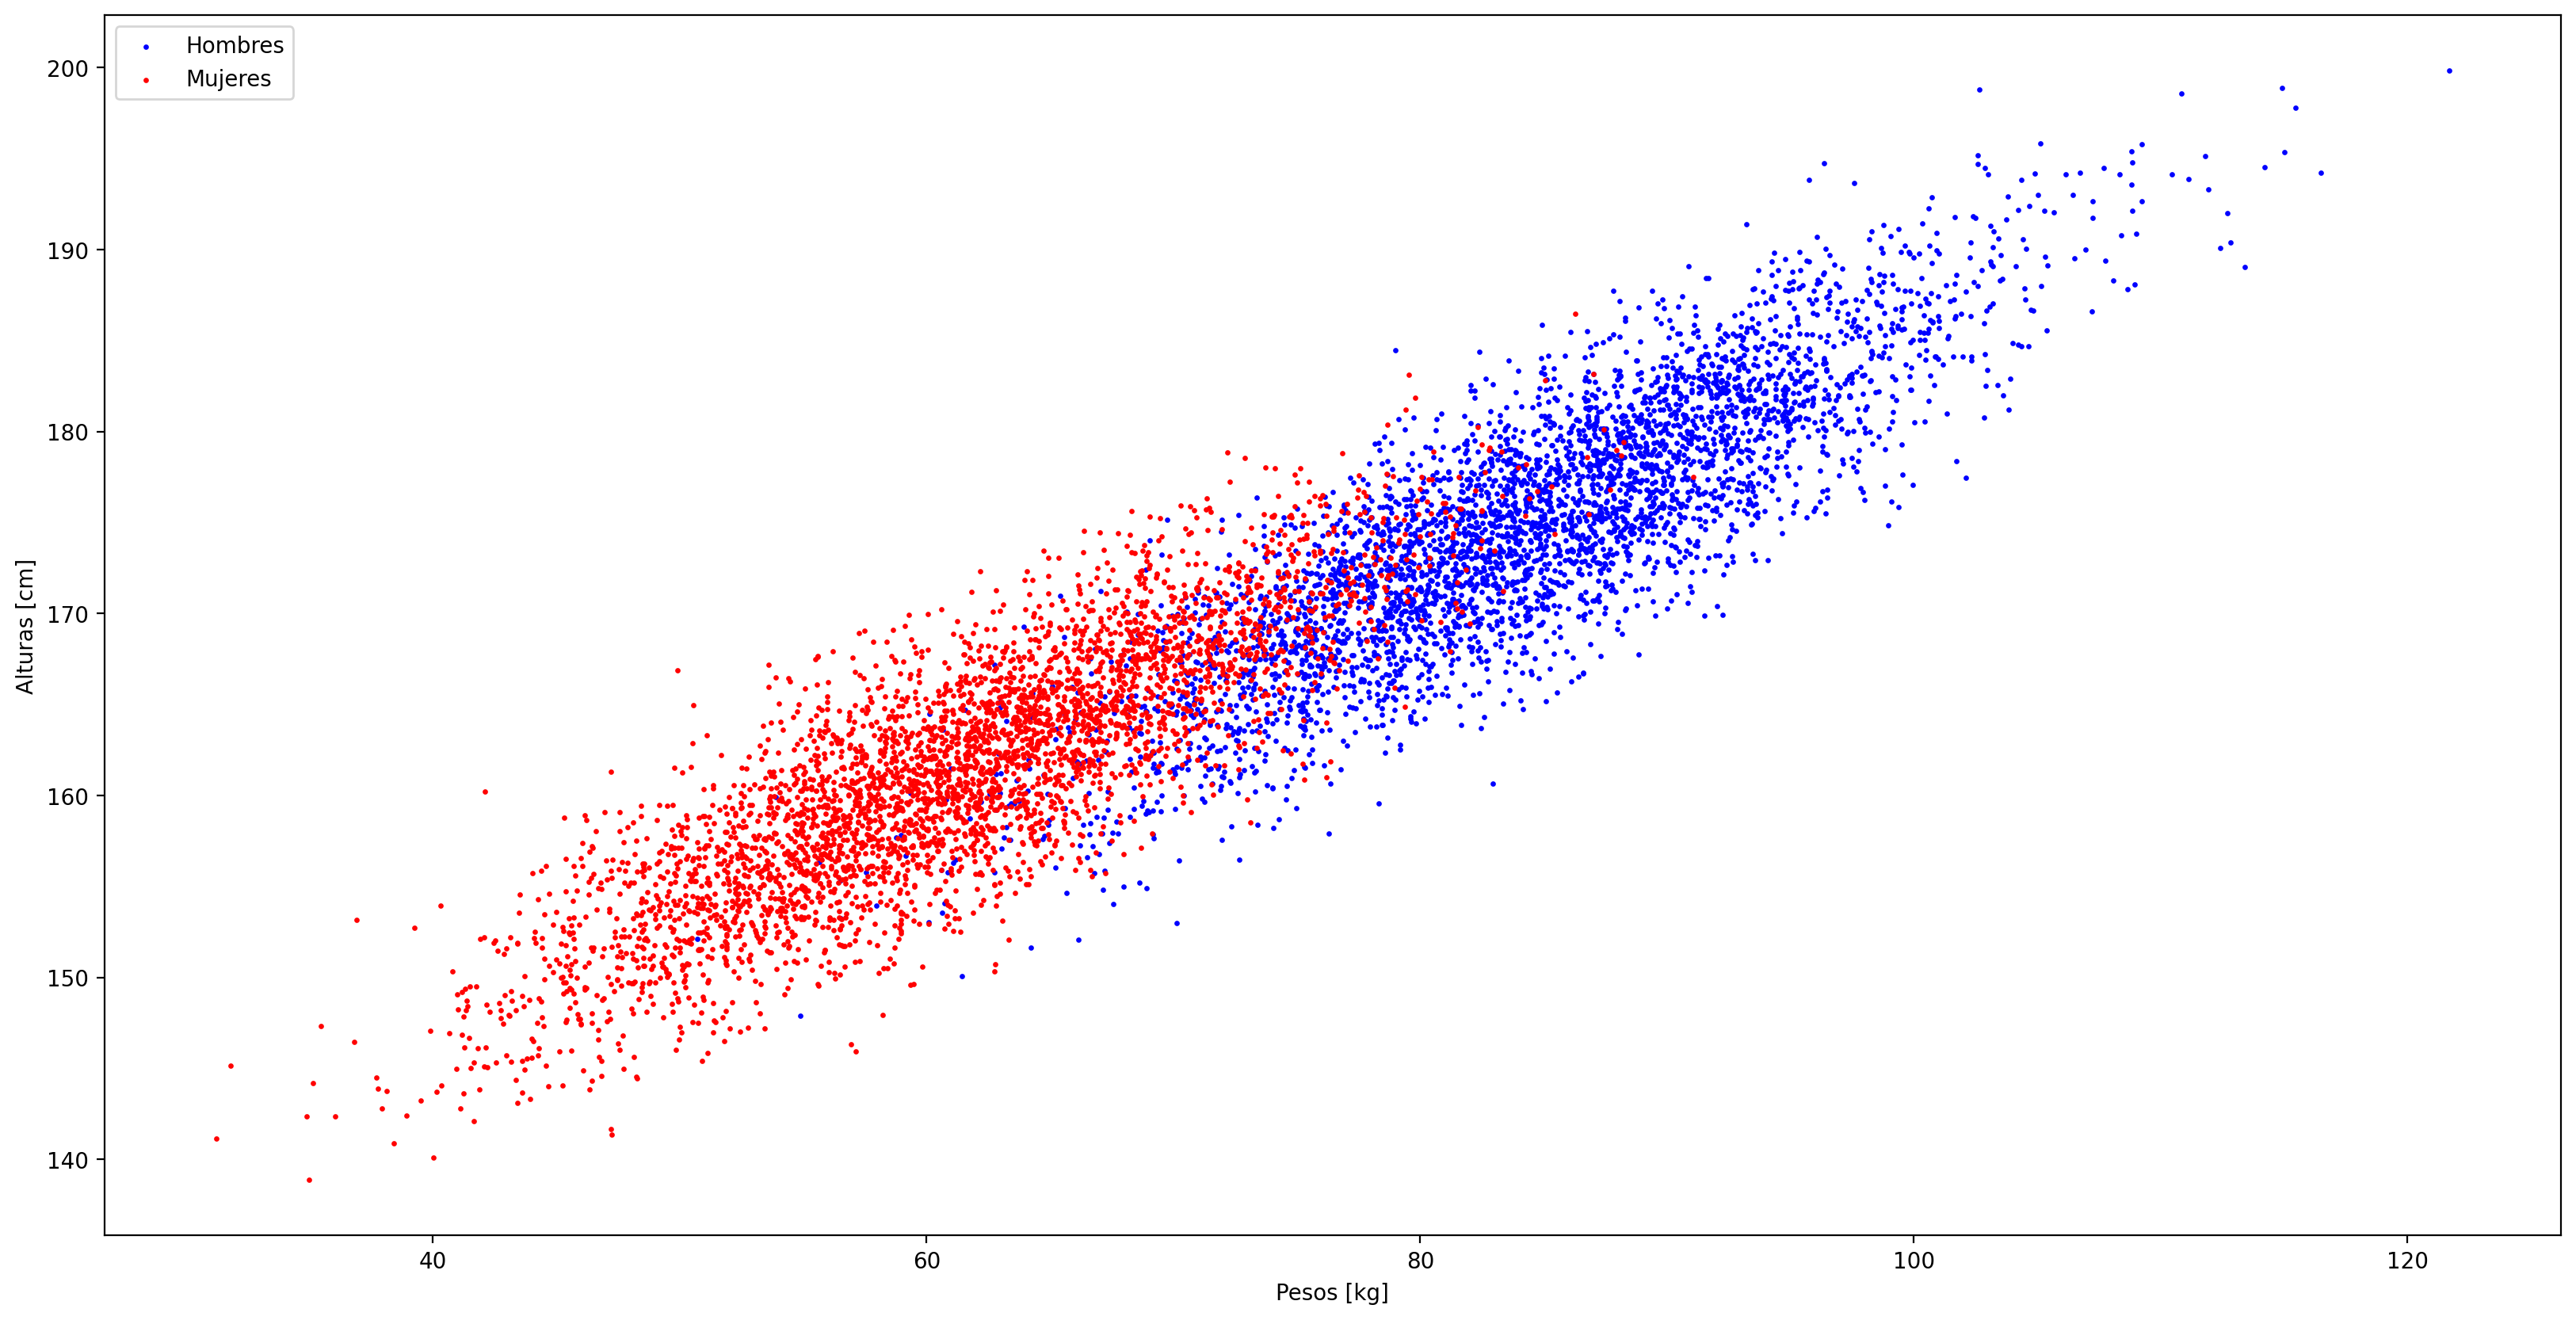

In [ ]:
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [kg]')
plt.ylabel('Alturas [cm]')
plt.legend()
plt.show()

Definición de una función para calcular probabilidades usando distribuciones Gaussianas
 ¿Qué hace?

Define una función que calcula la probabilidad de que una muestra pertenezca a cada clase (Hombre o Mujer) usando la distribución normal multivariada.
Calcula la verosimilitud (likelihood_class_1 y likelihood_class_2) usando multivariate_normal.pdf().
Calcula los prioris (probabilidad de cada clase antes de observar datos).
Obtiene la probabilidad posterior (p_class_1, p_class_2) aplicando la regla de Bayes.
Esto es clave en Análisis Discriminante Lineal (LDA), ya que se asume que los datos siguen una distribución Gaussiana.

In [ ]:
from scipy.stats import multivariate_normal

peso_altura_hombres = data.loc[data['Genero']=='Hombre'][['Peso', 'Altura']].values
peso_altura_mujeres = data.loc[data['Genero']=='Mujer'][['Peso', 'Altura']].values

def get_gauss_prob(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)

    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)

    prior_1 = N_class_1 / (N_class_1 + N_class_2)
    prior_2 = N_class_2 / (N_class_1 + N_class_2)

    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = (likelihood_class_1 * prior_1) / total
    p_class_2 = (likelihood_class_2 * prior_2) / total

    return p_class_1, p_class_2


Cálculo de Accuracy (precisión)
Usa get_gauss_prob() para calcular las probabilidades de cada clase.
Clasifica cada punto según cuál probabilidad es mayor.
Compara con la etiqueta real (data['Genero']=='Hombre') y calcula la precisión (accuracy).
Nos permite evaluar qué tan bien clasifica el modelo.

In [ ]:
def get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    p_class_1, p_class_2 = get_gauss_prob(data[['Peso', 'Altura']].values, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
    return ((p_class_1 > p_class_2) == (data['Genero'] == 'Hombre')).sum() / len(p_class_1)



Cálculo de los parámetros de LDA.
En LDA, asumimos que las clases comparten la misma matriz de covarianza.





In [ ]:
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)
cov_LDA = np.cov(np.vstack([peso_altura_hombres - mean_hombres, peso_altura_mujeres - mean_mujeres]).T)

In [ ]:
print(mean_hombres)
print(mean_mujeres)
print(cov_LDA)
print(np.cov(peso_altura_hombres.T))
print(np.cov(peso_altura_mujeres.T))

[ 84.45539805 174.91533033]
[ 61.13789495 161.30471261]
[[77.93836353 53.52473405]
 [53.52473405 50.2915853 ]]
[[80.69463867 56.28300274]
 [56.28300274 53.02237224]]
[[75.19882927 50.77709625]
 [50.77709625 47.57064786]]


Evaluación Del Modelo LDA

In [ ]:
acc_train_LDA = get_acc_gauss(data, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)
print(acc_train_LDA)

0.91675


In [ ]:
acc_test_LDA = get_acc_gauss(test, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)
print(acc_test_LDA)


0.9225


Generación de la malla de puntos para la visualización y Cálculo de distribuciones de probabilidad y LDA

In [ ]:
N = 300
X = np.linspace(data.min()['Peso'], data.max()['Peso'], N)
Y = np.linspace(data.min()['Altura'], data.max()['Altura'], N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H_LDA = multivariate_normal.pdf(pos, mean_hombres, cov_LDA)
Z_M_LDA = multivariate_normal.pdf(pos, mean_mujeres, cov_LDA)
Z_LDA, _ = get_gauss_prob(pos, mean_hombres, mean_mujeres, cov_LDA, cov_LDA)

Visualización 3D de las Distribuciones

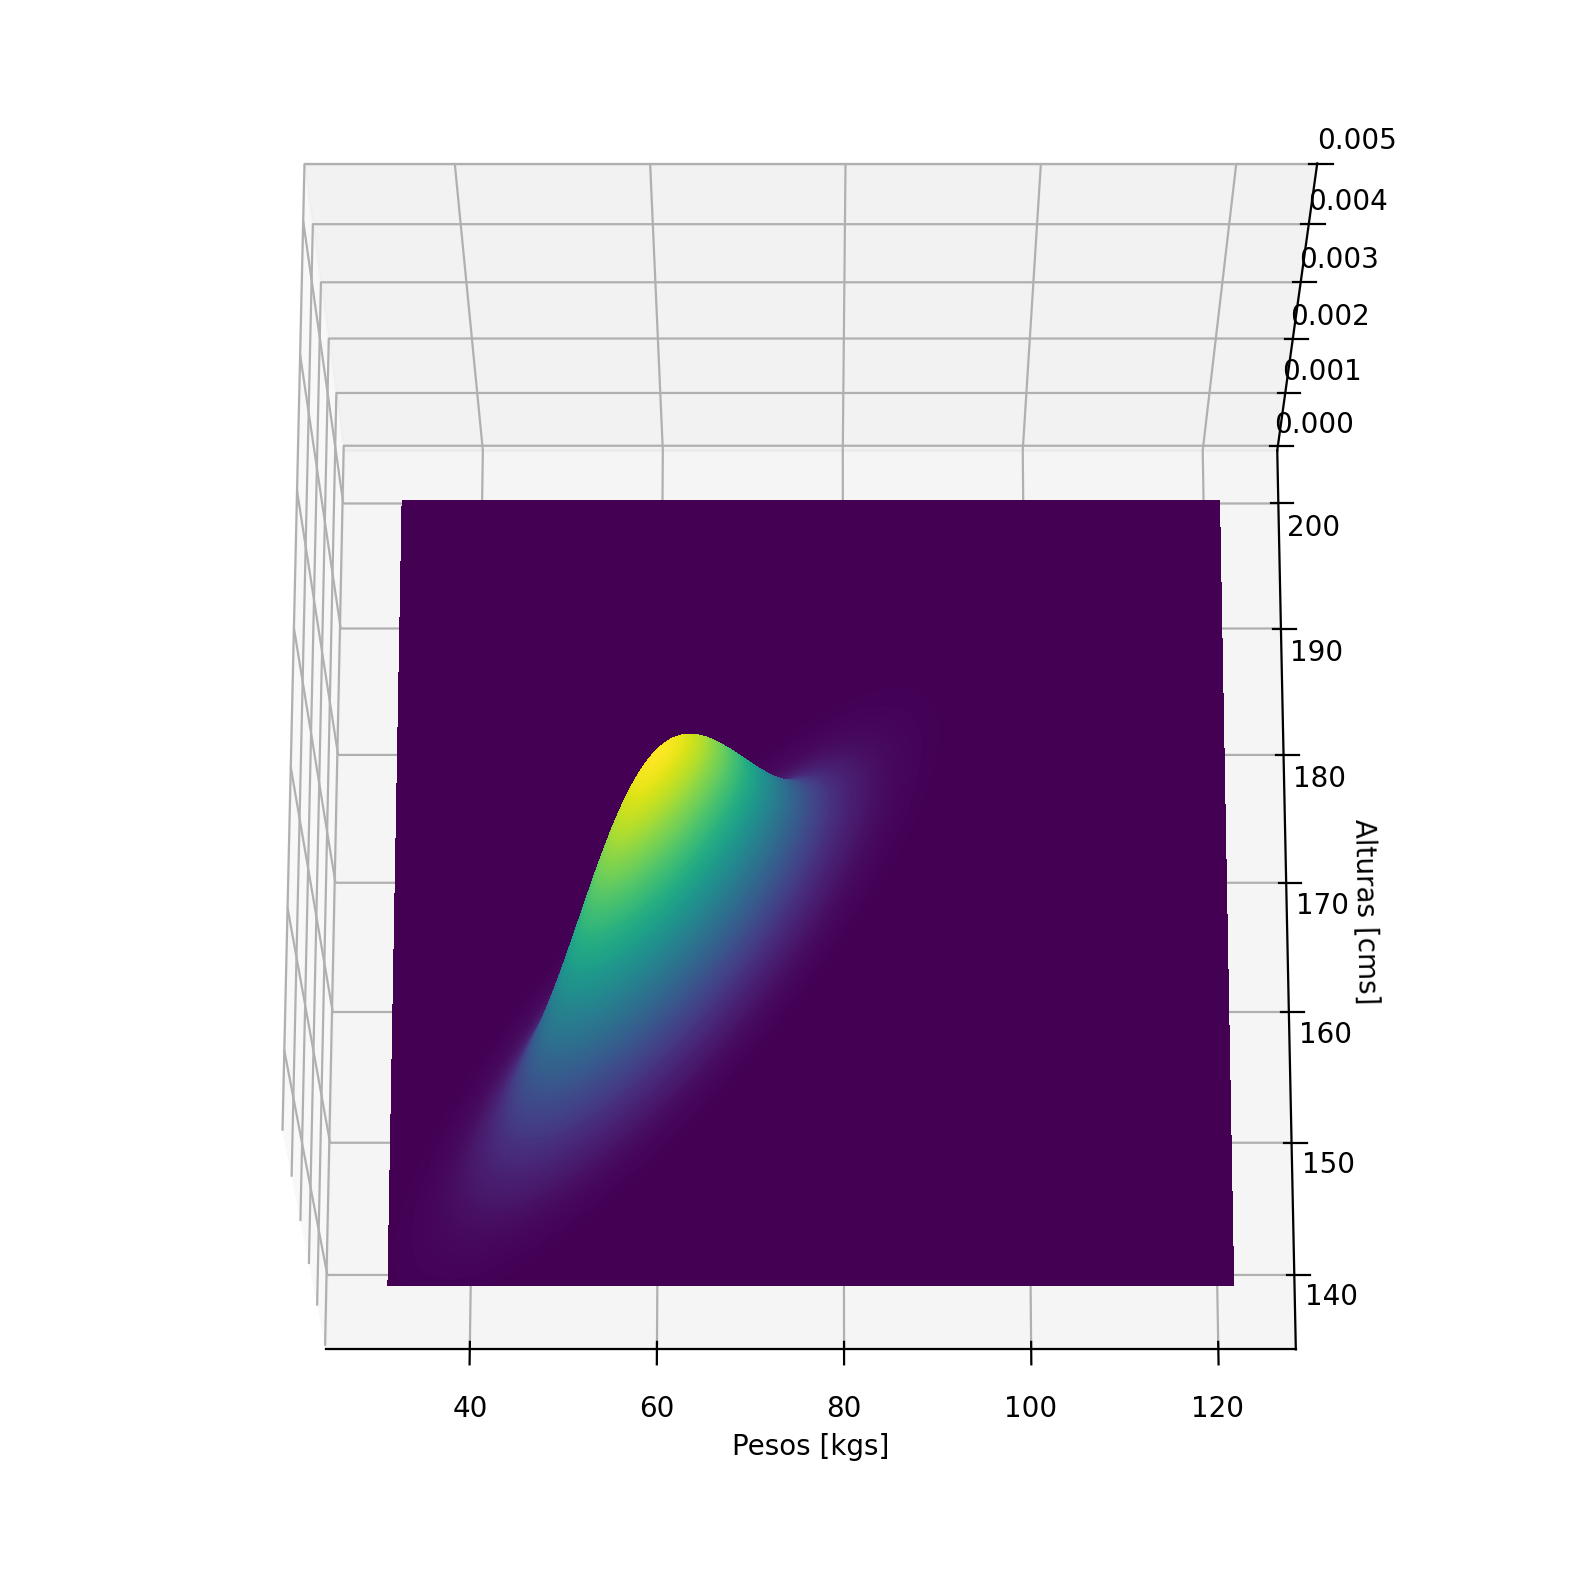

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
cm = plt.cm.RdBu

ax.contourf(X, Y, Z_H_LDA, 256)
ax.contourf(X, Y, Z_M_LDA, 256)
ax.view_init(70, -90)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()


Visualización de la frontera de decisión en 3D

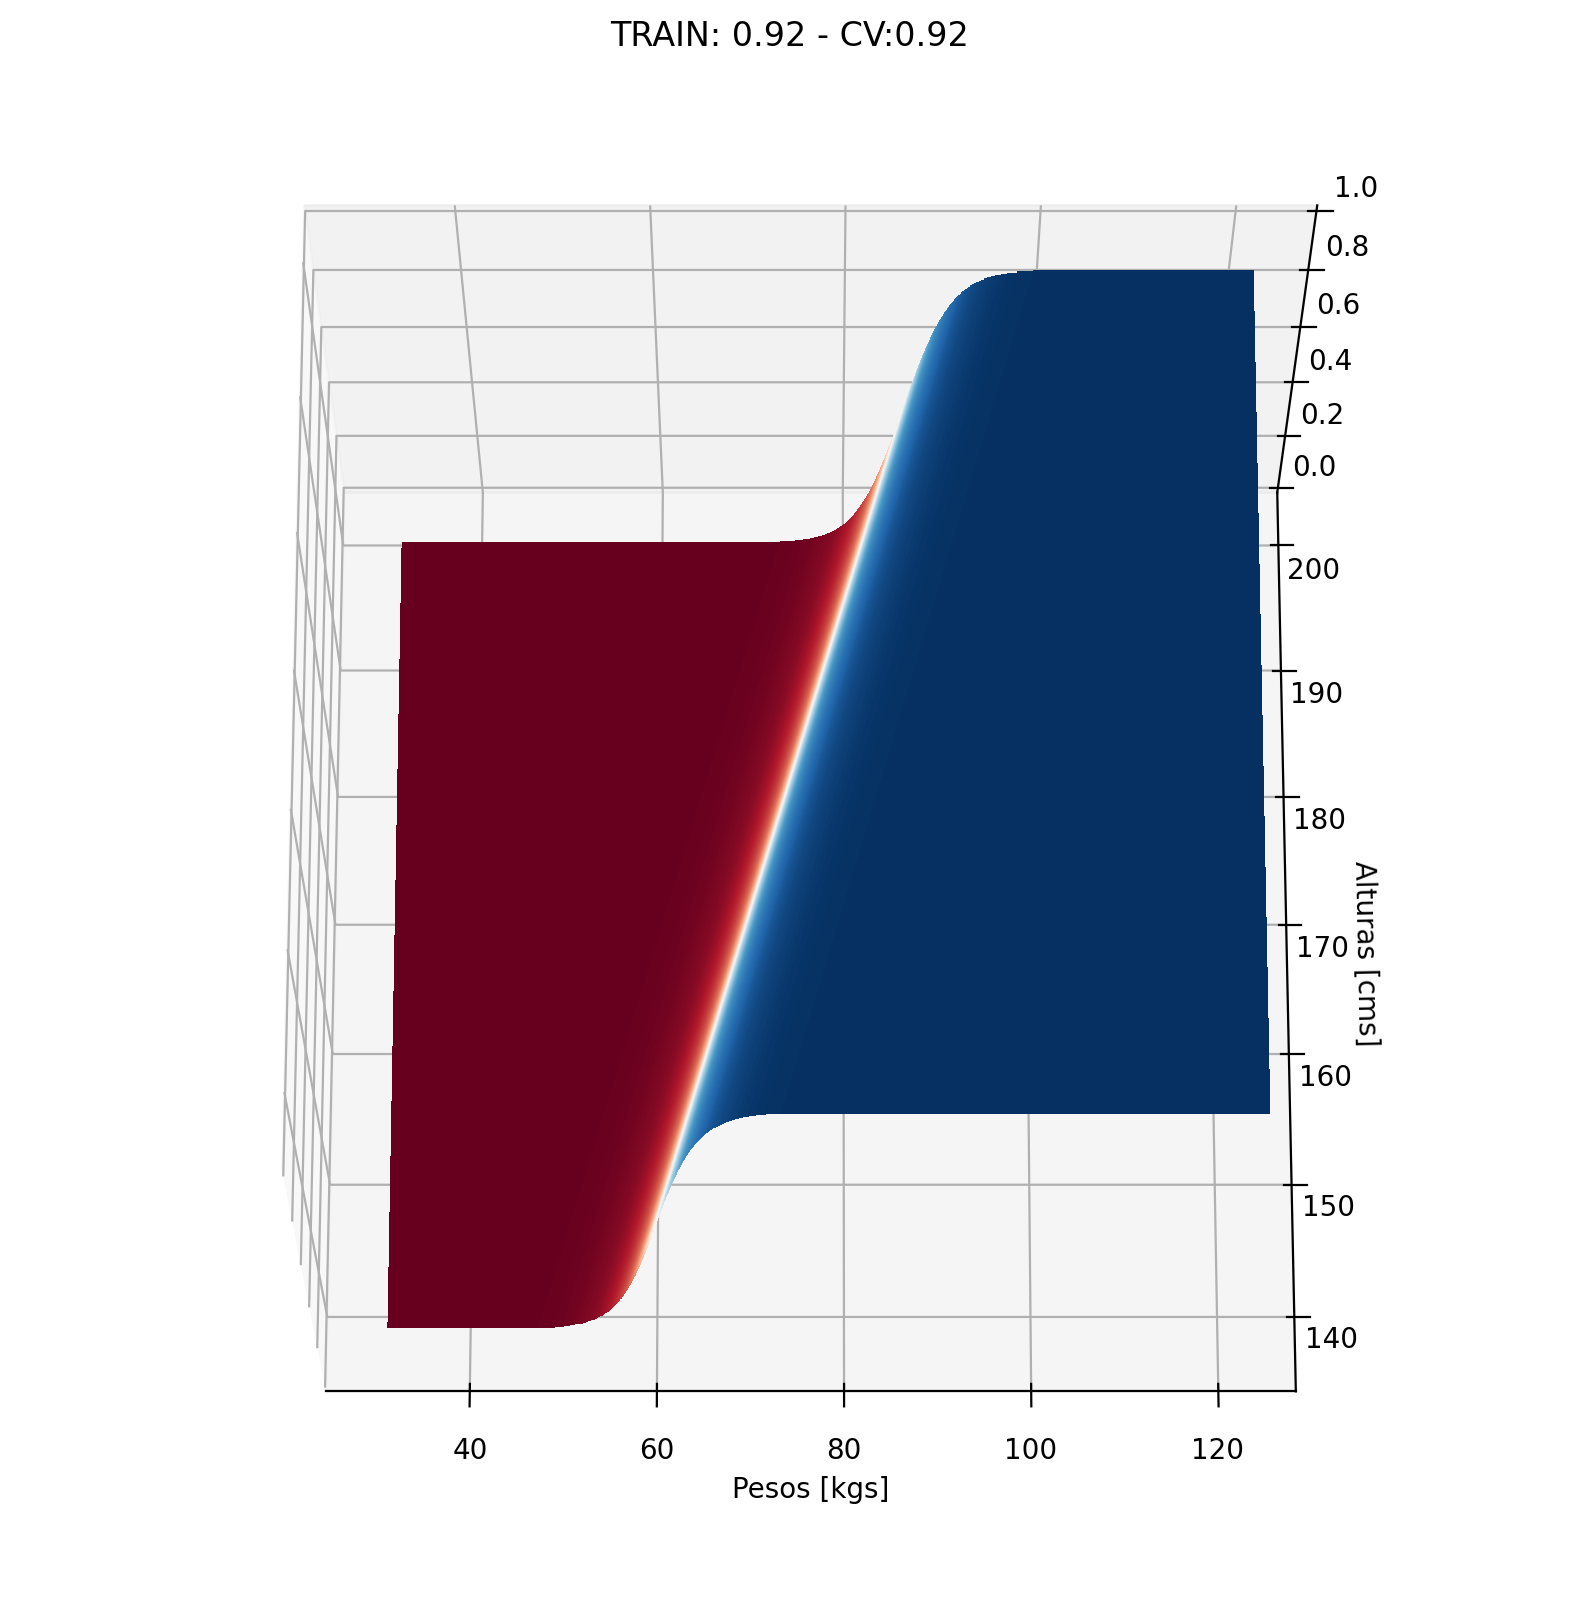

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
cm = plt.cm.RdBu

ax.contourf(X, Y, Z_LDA, 256, vmin=0., vmax=1., cmap=cm)
ax.set_title('TRAIN: ' + str(np.round(acc_train_LDA*100)/100) + ' - CV:' + str(np.round(acc_test_LDA*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
ax.view_init(70, -90)
plt.show()


Cálculo de la frontera de decisión teórica


1.   Calcula W, el vector de pesos de LDA:
W = np.linalg.inv(cov_LDA).dot(mean_hombres - mean_mujeres): Multiplica la inversa de la matriz de covarianza por la diferencia de medias. Este vector define la dirección en la que los datos están más separados.
2.   Calcula el término C:
C = np.log(N_hombres/N_mujeres) - 0.5 * (media_hombres + media_mujeres)^T Σ⁻¹ (media_hombres - media_mujeres): Define el sesgo para ajustar la frontera de decisión.



In [ ]:
W = np.linalg.inv(cov_LDA).dot(mean_hombres - mean_mujeres)
C = np.log(peso_altura_hombres.shape[0]/peso_altura_mujeres.shape[0]) - 0.5*(mean_hombres + mean_mujeres).T.dot(np.linalg.inv(cov_LDA)).dot(mean_hombres - mean_mujeres)


Verificación gráfica de la frontera de decisión

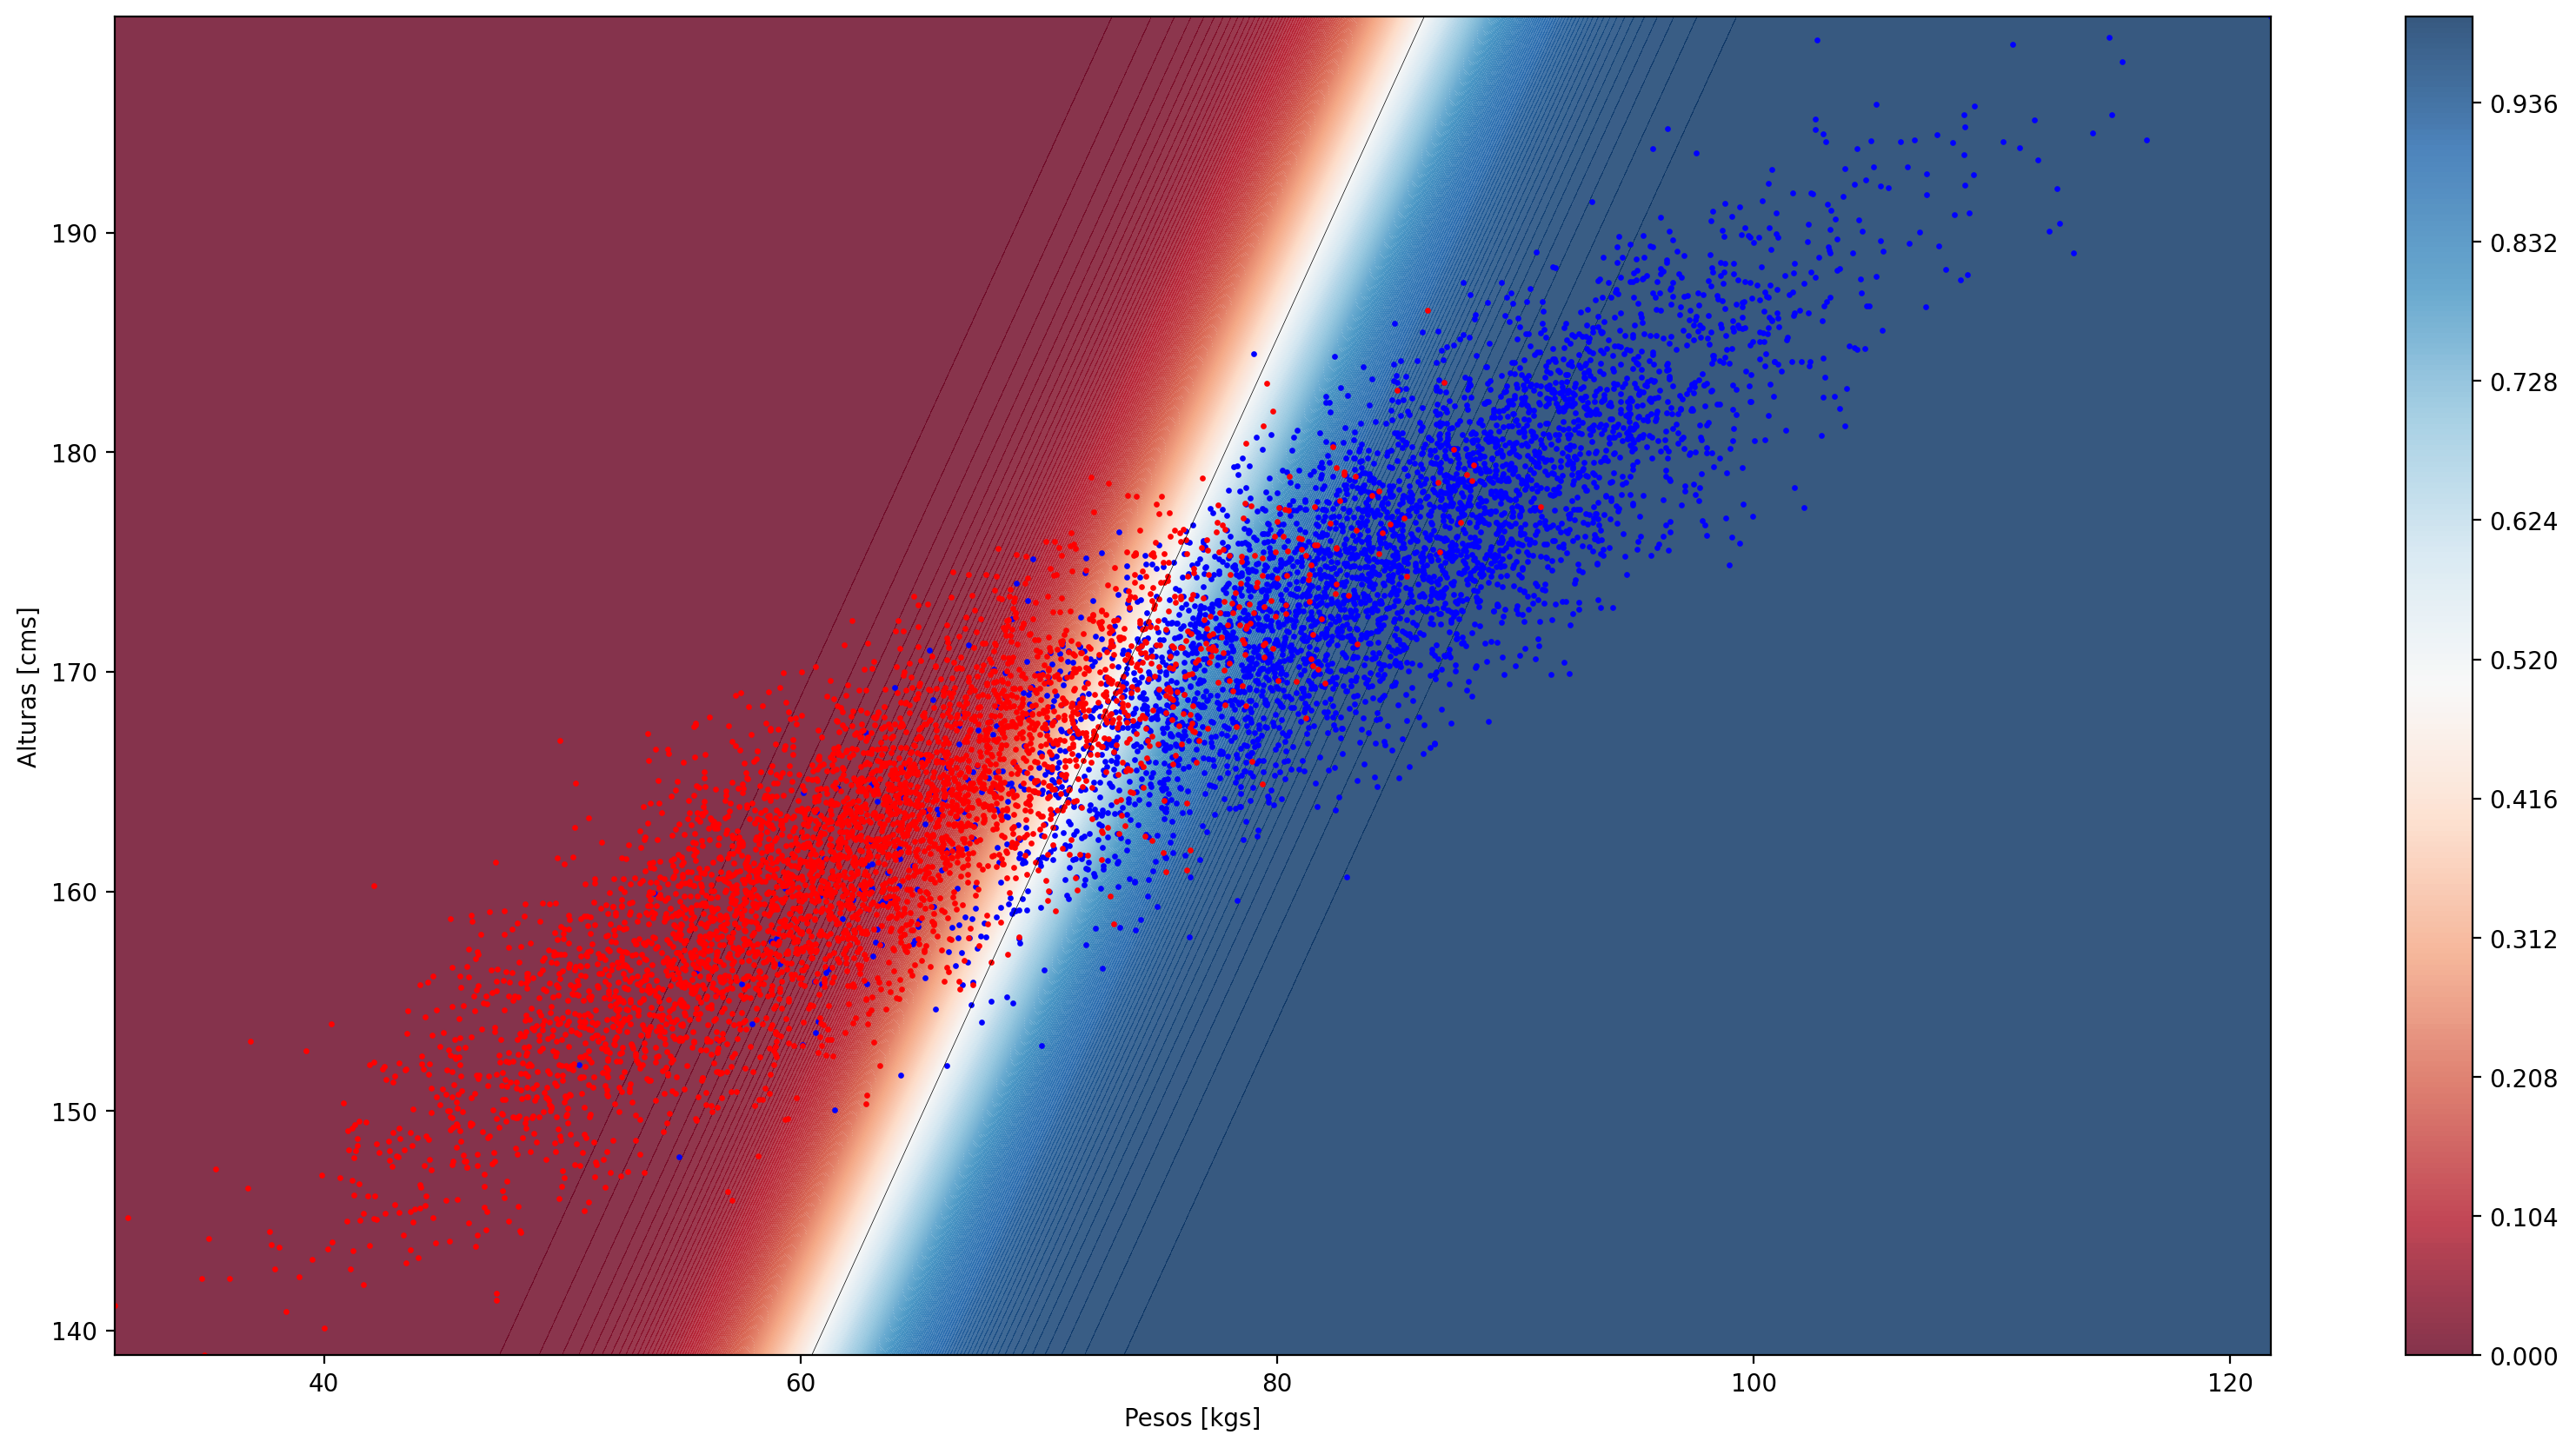

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_LDA, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)

ax.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
ax.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
ax.contour(X, Y, Z_LDA, (0.5,), colors='k', linewidths=0.25)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()


Esta gráfica permite visualizar cómo el modelo LDA clasifica a los individuos basándose en su peso y altura. La frontera de decisión separa las regiones de hombres y mujeres, y las densidades de probabilidad indican qué tan probable es que un punto pertenezca a una clase determinada.

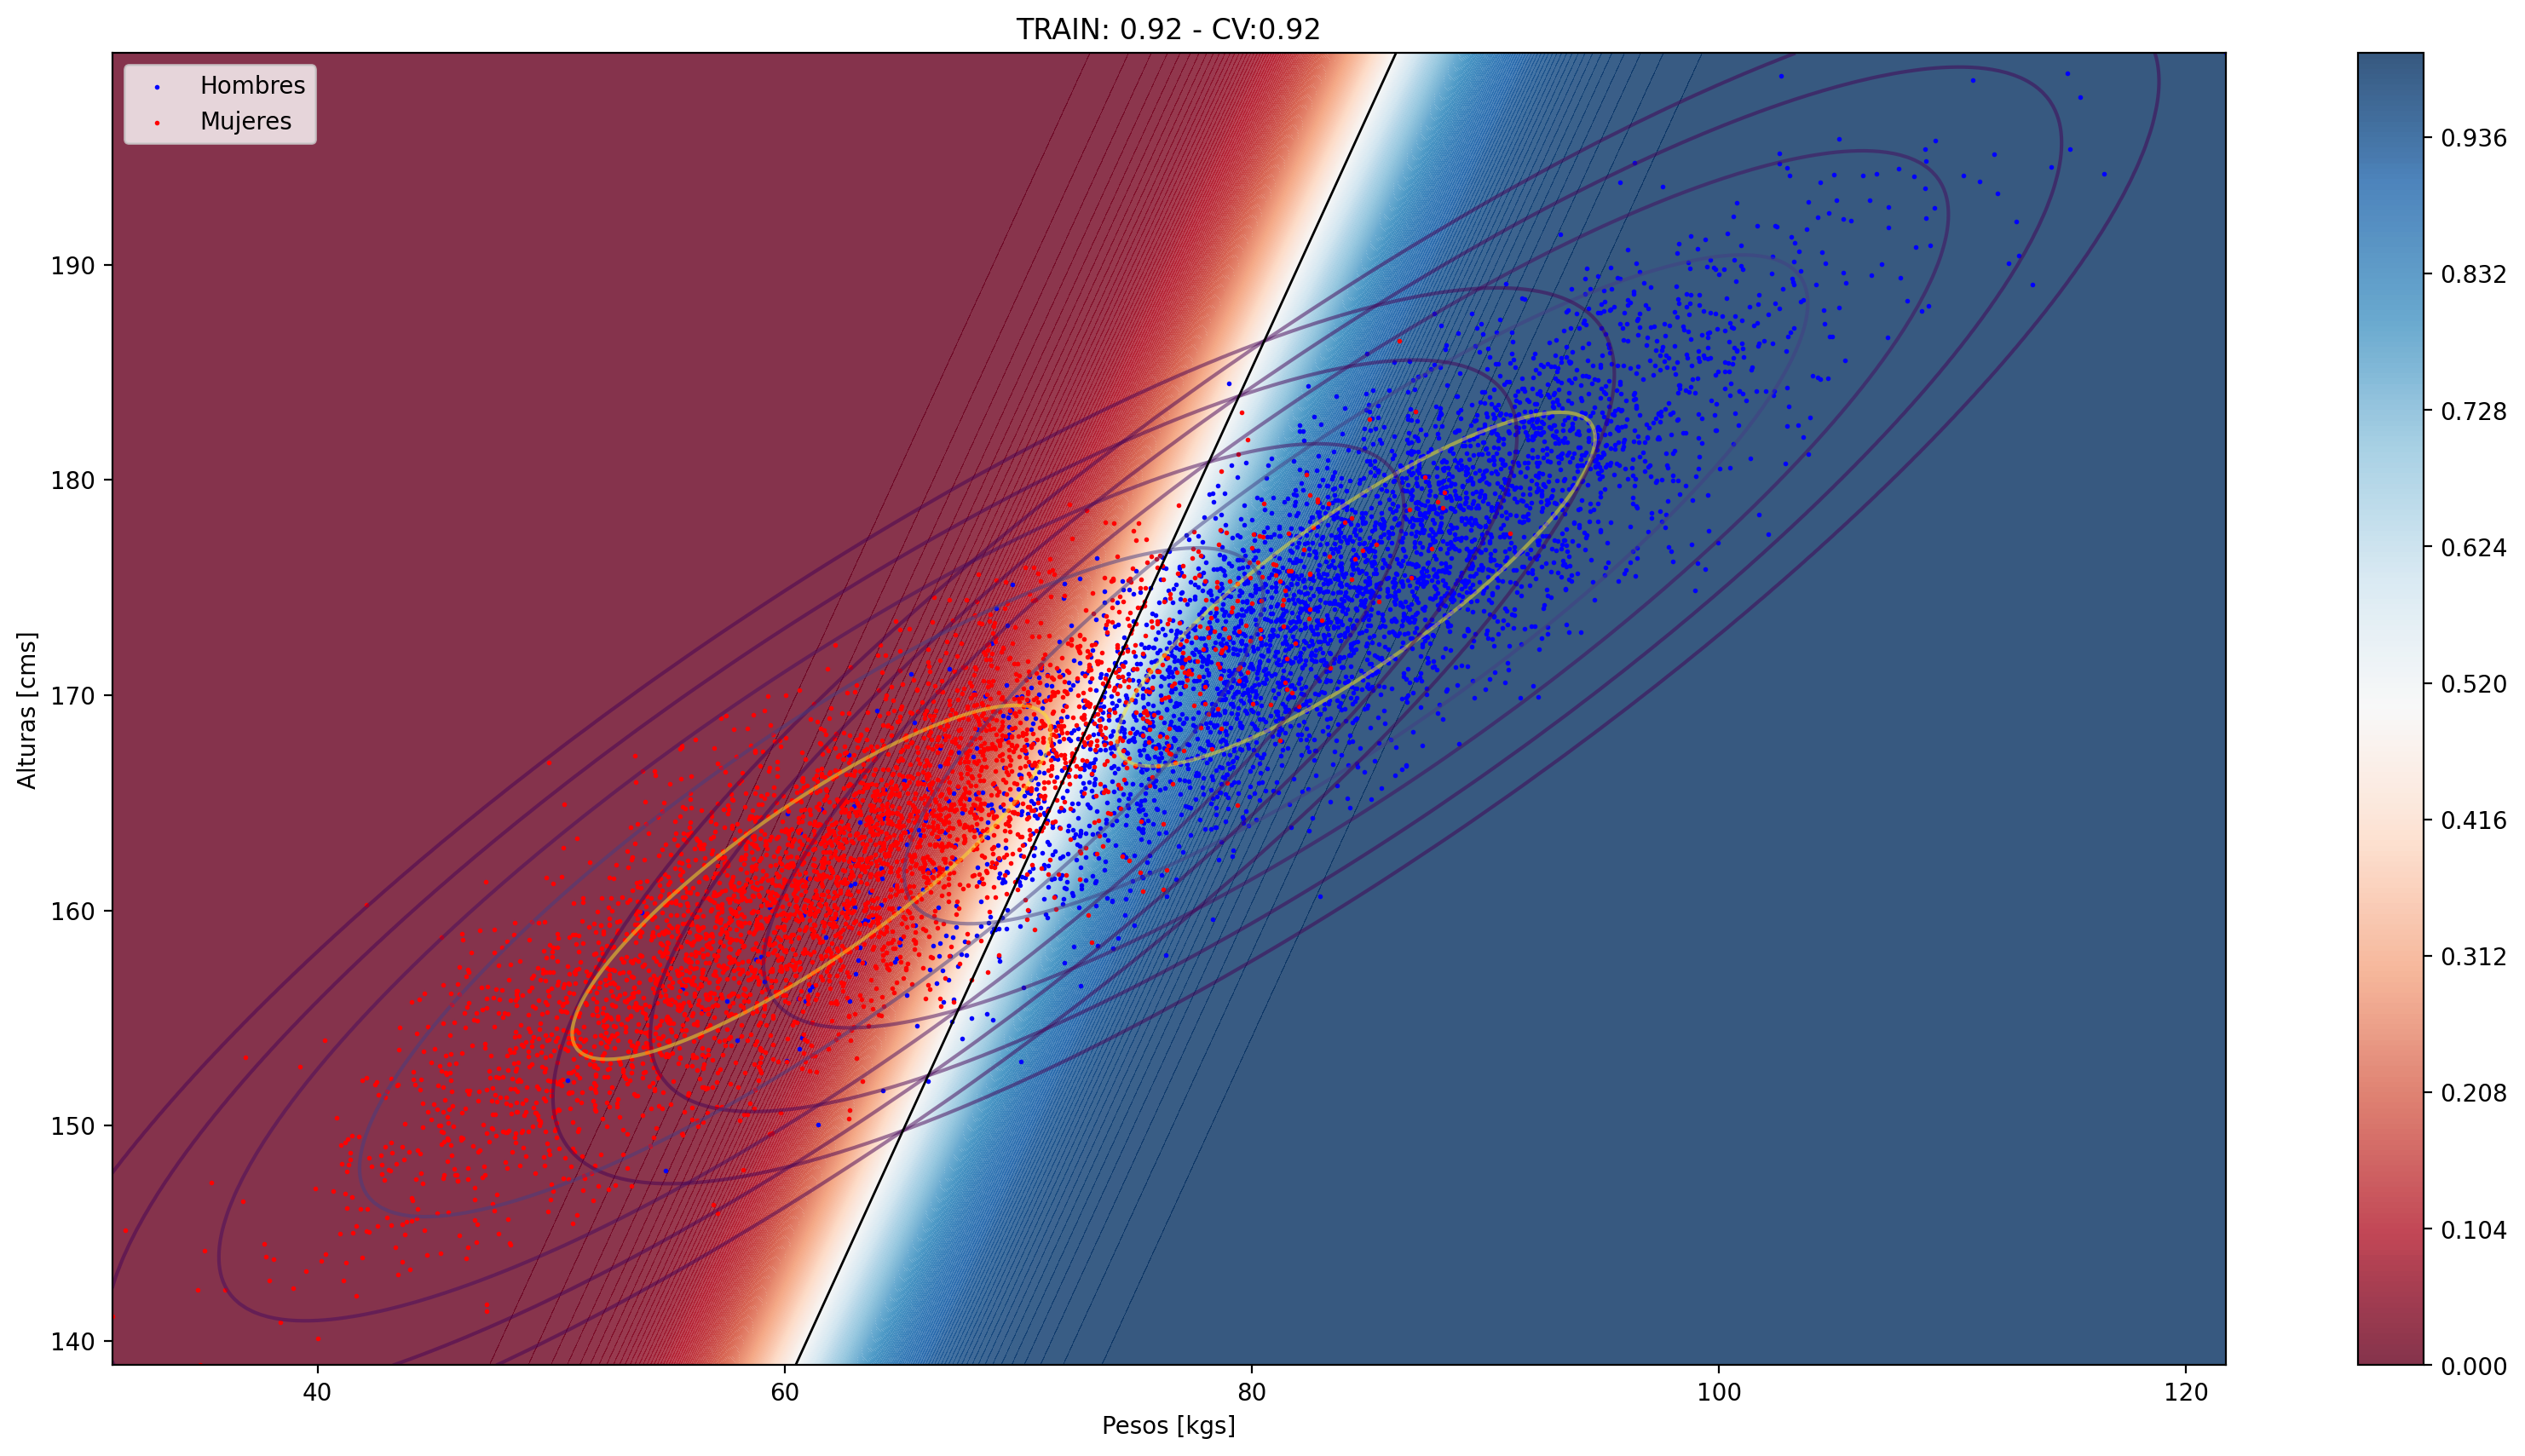

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_LDA, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,5)/4
ax.contour(X, Y, Z_H_LDA, z_levels, alpha=0.5)
ax.contour(X, Y, Z_M_LDA, z_levels, alpha=0.5)
ax.contour(X, Y, Z_LDA, (0.5,), colors='k', linewidths=1)
ax.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=1, label='Hombres')
ax.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=1, label='Mujeres')
ax.set_title('TRAIN: ' + str(np.round(acc_train_LDA*100)/100) + ' - CV:' + str(np.round(acc_test_LDA*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.legend()
plt.show()

Implementación De SkLearn

Importación e Inicialización del Modelo

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_clf = LinearDiscriminantAnalysis(store_covariance=True)

Entrenamiento del modelo con los datos de peso y altura. fit(...) ajusta el modelo LDA a estos datos.

In [ ]:
LDA_clf.fit(data[['Peso', 'Altura']], data['Genero'])


LinearDiscriminantAnalysis(store_covariance=True)

 Visualización de los parámetros del modelo

In [ ]:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
print(LDA_clf.covariance_)
print(LDA_clf.means_)

[[77.92862124 53.51804346]
 [53.51804346 50.28529885]]
[[ 84.45539805 174.91533033]
 [ 61.13789495 161.30471261]]


Evaluación del modelo en entrenamiento y prueba

In [ ]:
acc_train = LDA_clf.score(data[['Peso', 'Altura']], data['Genero'])
acc_test = LDA_clf.score(test[['Peso', 'Altura']], test['Genero'])
print(acc_train, acc_test)


0.91675 0.9225


Predicción de probabilidades en el conjunto de prueba. predict_proba(...) devuelve las probabilidades de pertenencia a cada clase.


*   Cada fila representa un individuo del conjunto de prueba.
*   La primera columna es la probabilidad de ser hombre.
*   La segunda columna es la probabilidad de ser mujer






In [ ]:
LDA_clf.predict_proba(test[['Peso', 'Altura']])


array([[0.99642699, 0.00357301],
       [0.01320522, 0.98679478],
       [0.05853607, 0.94146393],
       ...,
       [0.00181093, 0.99818907],
       [0.96659658, 0.03340342],
       [0.01726653, 0.98273347]])

Comparar las métricas obtenidas con las métricas obtenidas manualmente. Comparar los parámetros obtenidos. Explicar las diferencias

LDA Manual:

*   Train Acc = 0.91675
*   Test Acc = 0.9225

Parámetros:

*   Media de Hombres (Peso(kg),Altura(cm)) : [ 84.45539805 174.91533033]
*   Media de Mujeres (Peso(kg),Altura(cm)) : [ 61.13789495 161.30471261]
*   Matriz de Covarianza Global : [[77.93836353 53.52473405]
[53.52473405 50.2915853 ]] Los valores en la diagonal representan la varianza de cada variable (peso y altura).
Los valores fuera de la diagonal representan la covarianza entre peso y altura.
*   Matriz de Covarianza para hombres: [[80.69463867 56.28300274]
 [56.28300274 53.02237224]] Tiene una varianza del peso de 80.69 y una varianza de la altura de 53.02.
La covarianza entre peso y altura en hombres es 56.28.
*   Matriz de Covarianza para Muejres: [[75.19882927 50.77709625]
 [50.77709625 47.57064786]] La varianza del peso en mujeres es 75.20 y la de la altura es 47.57.
La covarianza entre peso y altura en mujeres es 50.78.





LDA SkLearn:

*   Train Acc = 0.91675
*   Test Acc = 0.9225

Parámetros:

*   Media de Hombres (Peso(kg),Altura(cm)) : [ 84.45539805 174.91533033]
*   Media de Mujeres (Peso(kg),Altura(cm)) : [ 61.13789495 161.30471261]
*   Matriz de Covarianza Global : [[77.93836353 53.52473405]
[53.52473405 50.2915853 ]]
*   Matriz de Covarianza para hombres: [[80.69463867 56.28300274]
 [56.28300274 53.02237224]]
*   Matriz de Covarianza para Muejres: [[75.19882927 50.77709625]
 [50.77709625 47.57064786]]

 No hay Diferencias





Extensión Cuadrática. Reentreno el Modelo con p, p2, a, a2, y p*a

In [ ]:
# Agregar las características cuadráticas en el conjunto de entrenamiento (data)
data['Peso2'] = data['Peso'] ** 2
data['Altura2'] = data['Altura'] ** 2
data['Peso_Altura'] = data['Peso'] * data['Altura']

# Agregar las mismas características cuadráticas en el conjunto de prueba (test)
test['Peso2'] = test['Peso'] ** 2
test['Altura2'] = test['Altura'] ** 2
test['Peso_Altura'] = test['Peso'] * test['Altura']

# Reentrenar el modelo con las características extendidas
LDA_clf = LinearDiscriminantAnalysis(store_covariance=True)
LDA_clf.fit(data[['Peso', 'Altura', 'Peso2', 'Altura2', 'Peso_Altura']], data['Genero'])

# Métricas de entrenamiento y validación
acc_train = LDA_clf.score(data[['Peso', 'Altura', 'Peso2', 'Altura2', 'Peso_Altura']], data['Genero'])
acc_test = LDA_clf.score(test[['Peso', 'Altura', 'Peso2', 'Altura2', 'Peso_Altura']], test['Genero'])

print(acc_train, acc_test)


0.91575 0.92


El umbral de decisión sigue siendo lineal? Cuántos parámetros tiene el modelo ahora? Cuántos parámetros tenía antes? Cómo dan las métricas de train y validación?

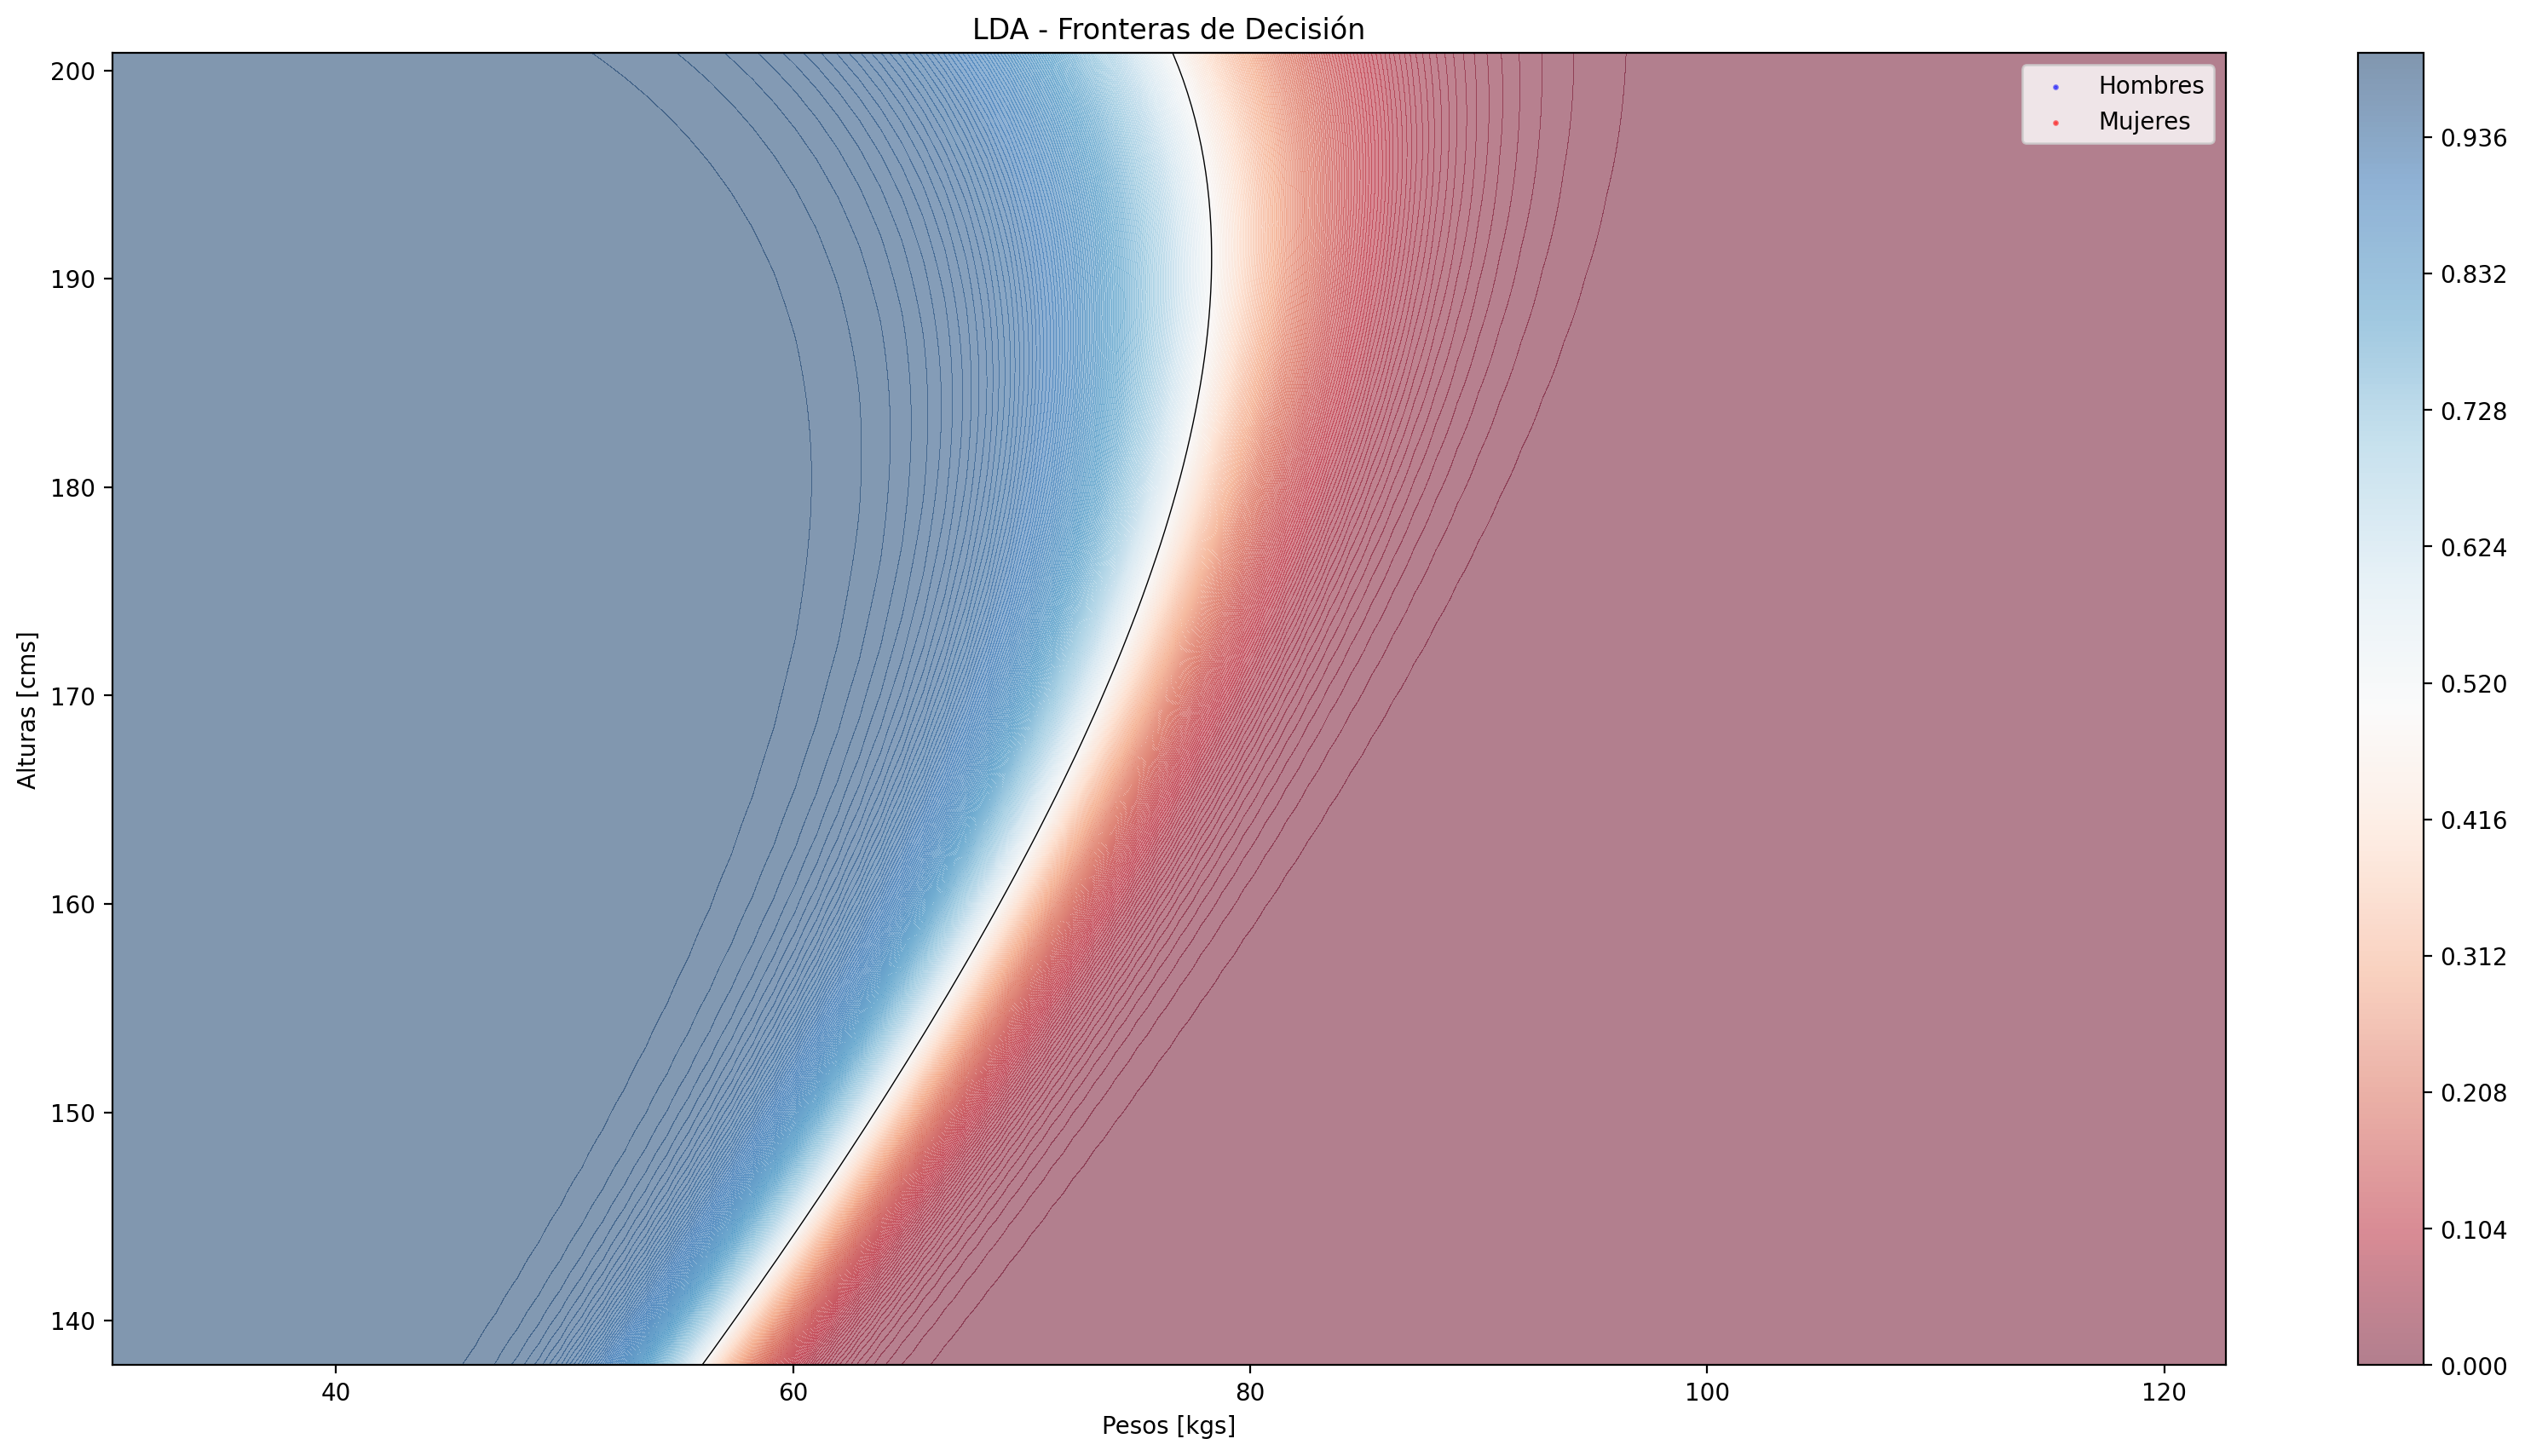

In [ ]:

# Crear las nuevas características cuadráticas
def add_polynomial_features(X):
    X_poly = X.copy()
    X_poly['Peso2'] = X['Peso'] ** 2
    X_poly['Altura2'] = X['Altura'] ** 2
    X_poly['Peso_Altura'] = X['Peso'] * X['Altura']
    return X_poly

# Crear una cuadrícula de puntos para el gráfico de contornos
x_min, x_max = data['Peso'].min() - 1, data['Peso'].max() + 1
y_min, y_max = data['Altura'].min() - 1, data['Altura'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Convertir la cuadrícula a un DataFrame
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid_points, columns=['Peso', 'Altura'])

# Agregar las características cuadráticas a la cuadrícula
grid_df = add_polynomial_features(grid_df)

# Entrenar el modelo LDA con las características extendidas
LDA_clf = LinearDiscriminantAnalysis()
LDA_clf.fit(data[['Peso', 'Altura', 'Peso2', 'Altura2', 'Peso_Altura']], data['Genero'])

# Predecir las probabilidades en cada punto de la cuadrícula
Z = LDA_clf.predict_proba(grid_df)[:, 1]  # Probabilidad para la clase 1 (por ejemplo, mujeres)
Z = Z.reshape(xx.shape)

# Visualizar las fronteras de decisión
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()

# Contorno de las probabilidades
cm = plt.cm.RdBu
cf = ax.contourf(xx, yy, Z, 256, alpha=.5, vmin=0., vmax=1., cmap=cm)

# Añadir la barra de color
plt.colorbar(cf, ax=ax)

# Contorno de la frontera de decisión (umbral 0.5)
ax.contour(xx, yy, Z, (0.5,), colors='k', linewidths=0.5)

# Graficar los puntos
data_hombres = data[data['Genero'] == 0].values[:, [0, 1]]  # Hombres (suponiendo '0' para hombres)
data_mujeres = data[data['Genero'] == 1].values[:, [0, 1]]  # Mujeres (suponiendo '1' para mujeres)
ax.scatter(data_hombres[:, 0], data_hombres[:, 1], color='b', s=2, alpha=0.5, label='Hombres')
ax.scatter(data_mujeres[:, 0], data_mujeres[:, 1], color='r', s=2, alpha=0.5, label='Mujeres')

# Etiquetas y título
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.title('LDA - Fronteras de Decisión')
plt.legend()
plt.show()


El umbral de decisión sigue siendo lineal. Aunque al agregar nuevas características (como p2, a2, y p * a) aumentamos la dimensión del espacio de características, el modelo sigue siendo un clasificador lineal, ya que Linear Discriminant Analysis (LDA) sigue haciendo una clasificación basada en una combinación lineal de las características.


Añadimos tres nuevas características al modelo, por lo que el número total de características es 5.

En el caso de un clasificador LDA, el número de parámetros para el modelo incluye:

Los coeficientes de la combinación lineal: Como tienes 5 características (con la extensión cuadrática), el número de coeficientes es igual a 5 (uno por cada característica).

Los parámetros de la media y covarianza: LDA tiene una covarianza común para todas las clases. Entonces, se necesitarían parámetros adicionales para la media de cada clase, que es 2 (una para cada clase de "Genero").

Entonces, el número de parámetros sería 5 coeficientes + 2 medias + 1 covarianza. Sin embargo, la covarianza se estima comúnmente como una matriz de covarianza, lo cual implica un número mayor de parámetros (en este caso, 5x5=25 parámetros para la matriz de covarianza).

Antes de aplicar la extensión cuadrática, con las características Peso y Altura, el número de parámetros era:

2 coeficientes (uno por cada característica)

2 medias (una por cada clase)

1 covarianza (una matriz de 2x2)

Esto da un total de 2 coeficientes + 2 medias + 1 matriz de covarianza de 2x2 (4 parámetros en la matriz de covarianza), lo que da un total de 8 parámetros.

 Utilizando la librería sklearn y sin necesidad de entender cómo se entrena (correr el método .fit), entrenar el modelo LogisticRegression utilizando como parámetro C=1e12. Informar métricas, parámetros y umbral de decisión. En clase analizaremos la comparación con lo obtenido por LDA.

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las características y la variable objetivo
X_train = data[['Peso', 'Altura', 'Peso2', 'Altura2', 'Peso_Altura']]
y_train = data['Genero']

# Definir el modelo de regresión logística con C=1e12
log_reg = LogisticRegression(C=1e12, solver='liblinear')

# Entrenar el modelo
log_reg.fit(X_train, y_train)

# Obtener métricas del modelo
y_pred_train = log_reg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
report = classification_report(y_train, y_pred_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Obtener parámetros del modelo
coeficientes = log_reg.coef_
intercepto = log_reg.intercept_

# Obtener el umbral de decisión
threshold = 0.5  # Por defecto, scikit-learn usa 0.5 como umbral

# Imprimir resultados
print("Exactitud del modelo (accuracy):", accuracy)
print("\nReporte de clasificación:\n", report)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nCoeficientes del modelo:\n", coeficientes)
print("\nIntercepto:\n", intercepto)
print("\nUmbral de decisión:", threshold)


Exactitud del modelo (accuracy): 0.91725

Reporte de clasificación:
               precision    recall  f1-score   support

      Hombre       0.92      0.92      0.92      4002
       Mujer       0.92      0.92      0.92      3998

    accuracy                           0.92      8000
   macro avg       0.92      0.92      0.92      8000
weighted avg       0.92      0.92      0.92      8000


Matriz de confusión:
 [[3672  330]
 [ 332 3666]]

Coeficientes del modelo:
 [[-4.16667069e-06  1.18352870e-04  1.17517630e-03  1.32566997e-03
  -3.57186428e-03]]

Intercepto:
 [1.25372406e-06]

Umbral de decisión: 0.5


Precision (Precisión) → Indica cuántas de las predicciones positivas fueron realmente correctas.

Ejemplo: Si el modelo dice que alguien es "Mujer", ¿cuántas veces acertó?

Recall (Sensibilidad o Tasa de Verdaderos Positivos) → Indica cuántos de los casos positivos reales fueron correctamente identificados.

Ejemplo: De todas las mujeres reales, ¿cuántas fueron clasificadas correctamente?

F1-score → Es la media armónica de la precisión y la sensibilidad. Sirve para balancear ambos valores.

Support (Soporte) → Es la cantidad de ejemplos reales de cada clase en el conjunto de datos

Macro avg (Promedio macro) → Es el promedio simple de precisión, recall y F1-score de todas las clases (sin importar cuántos ejemplos haya por clase).

Weighted avg (Promedio ponderado) → Es similar al macro, pero da más peso a las clases con más datos.

En este caso, ambas métricas son similares porque la cantidad de hombres y mujeres en el dataset es casi la misma.

